In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
shots = pd.read_csv('../data/shots_2007-2023.csv')

In [3]:
shots.event.value_counts()

event
SHOT    1202250
MISS     514804
GOAL     123164
Name: count, dtype: int64

In [4]:
shots.head()

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
0,0,TBL,NSH,2023,0,20001,1,10,61,9.0,...,0.249174,0.035816,0.379310,0.277143,0.022744,0.751320,1.0,1.0,TBL,59.0
1,1,TBL,NSH,2023,0,20001,1,11,70,26.0,...,0.107945,0.051284,0.464358,0.298119,0.020588,0.589712,1.0,1.0,TBL,81.0
2,2,TBL,NSH,2023,0,20001,1,13,107,2.0,...,0.236193,0.030269,0.390417,0.301375,0.025620,0.785765,1.0,1.0,TBL,55.0
3,3,TBL,NSH,2023,0,20001,1,19,177,35.0,...,0.198635,0.033686,0.438052,0.291724,0.021107,0.724471,1.0,1.0,TBL,58.0
4,4,TBL,NSH,2023,0,20001,1,21,231,29.0,...,0.188582,0.027146,0.406288,0.349752,0.019523,0.727481,0.0,0.0,NSH,64.0


In [5]:
just_shots = shots.loc[shots['event'] == 'SHOT'].reset_index(drop = True)

In [6]:
reg_szn_shots = just_shots.loc[just_shots['isPlayoffGame'] == 0]

In [7]:
reg_szn_shots.head()

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
0,0,TBL,NSH,2023,0,20001,1,10,61,9.0,...,0.249174,0.035816,0.379310,0.277143,0.022744,0.751320,1.0,1.0,TBL,59.0
1,1,TBL,NSH,2023,0,20001,1,11,70,26.0,...,0.107945,0.051284,0.464358,0.298119,0.020588,0.589712,1.0,1.0,TBL,81.0
2,2,TBL,NSH,2023,0,20001,1,13,107,2.0,...,0.236193,0.030269,0.390417,0.301375,0.025620,0.785765,1.0,1.0,TBL,55.0
3,3,TBL,NSH,2023,0,20001,1,19,177,35.0,...,0.198635,0.033686,0.438052,0.291724,0.021107,0.724471,1.0,1.0,TBL,58.0
4,6,TBL,NSH,2023,0,20001,1,31,435,10.0,...,0.185517,0.046360,0.352976,0.308623,0.020289,0.796413,0.0,1.0,NSH,75.0


In [8]:
shots.shape

(1840218, 124)

In [9]:
shots['teamCode'] = shots['teamCode'].str.replace('S.J', 'SJS')

In [10]:
shots['teamCode'] = shots['teamCode'].str.replace('T.B', 'TBL')

In [11]:
shots['teamCode'] = shots['teamCode'].str.replace('N.J', 'NJD')

In [12]:
shots['teamCode'] = shots['teamCode'].str.replace('L.A', 'LAK')

How many goals are there per season/playoffs?

In [14]:
goals = shots.loc[shots['event'] == 'GOAL'].reset_index(drop = True)

In [15]:
goals.head()

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
0,10,TBL,NSH,2023,0,20001,1,43,588,0.0,...,0.176175,0.032857,0.401291,0.327446,0.025333,0.693671,1.0,1.0,TBL,50.0
1,44,TBL,NSH,2023,0,20001,1,178,2175,0.0,...,0.134414,0.056219,0.352016,0.273352,0.025170,0.779774,0.0,1.0,NSH,81.0
2,50,TBL,NSH,2023,0,20001,1,206,2411,0.0,...,0.163421,0.104072,0.284227,0.172749,0.022472,0.947874,0.0,1.0,NSH,82.0
3,59,TBL,NSH,2023,0,20001,1,223,2545,0.0,...,0.312801,0.157645,0.154111,0.059869,0.024670,0.973102,1.0,1.0,TBL,83.0
4,67,TBL,NSH,2023,0,20001,1,256,2928,0.0,...,0.097908,0.041274,0.321319,0.188160,0.021889,0.817812,0.0,1.0,NSH,73.0


In [16]:
reg_szn_goals = goals.loc[goals['isPlayoffGame'] == 0]

In [17]:
goals_per_season = reg_szn_goals.groupby(['season'])['event'].value_counts().reset_index()

In [18]:
goals_per_season

,season,event,count
0,2007,GOAL,6723
1,2008,GOAL,6978
2,2009,GOAL,6783
3,2010,GOAL,6694
4,2011,GOAL,6518
5,2012,GOAL,3814
6,2013,GOAL,6552
7,2014,GOAL,6535
8,2015,GOAL,6548
9,2016,GOAL,6690


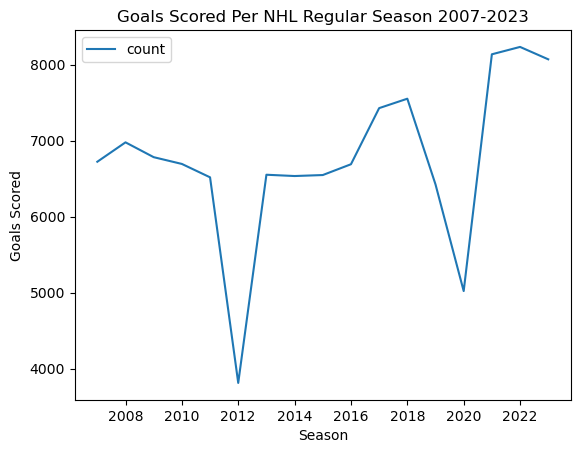

In [19]:
goals_per_season.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Goals Scored", fontsize=10)
plt.title("Goals Scored Per NHL Regular Season 2007-2023")
#plt.savefig('Goals Scored Per Regular Season.png', bbox_inches='tight')
plt.show();

NOTES: 

    1) 2012 only 48 games were played total due to a Lockout
    
    2) 2017 NHL Expansion adding VGK
    
    3) 2019 due to Covid-19 teams played between 68-71 games (Playoffs included Qualifying Round for teams)
    

In [21]:
po_goals = goals.loc[goals['isPlayoffGame'] == 1]

In [22]:
po_goals.loc[po_goals['season'] == 2023]

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
8070,114785,CAR,NYI,2023,1,30141,1,16,95,0.0,...,0.128922,0.047988,0.531417,0.234502,0.018357,0.717610,1.0,1.0,CAR,75.0
8071,114796,CAR,NYI,2023,1,30141,1,54,500,0.0,...,0.177680,0.063454,0.211461,0.183052,0.025997,0.944850,0.0,1.0,NYI,87.0
8072,114848,CAR,NYI,2023,1,30141,1,237,2624,0.0,...,0.215584,0.083692,0.224253,0.185969,0.027648,0.942498,1.0,1.0,CAR,83.0
8073,114875,CAR,NYI,2023,1,30141,1,316,3508,0.0,...,0.015024,0.011861,0.247693,0.224513,0.019688,0.609517,1.0,1.0,CAR,29.0
8074,114884,BOS,TOR,2023,1,30121,1,23,146,0.0,...,0.174452,0.043799,0.358452,0.289642,0.026702,0.820050,1.0,1.0,BOS,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8568,122385,EDM,FLA,2023,1,30416,1,319,3405,0.0,...,0.024304,0.007688,0.121802,0.140724,0.011984,0.724795,1.0,1.0,EDM,26.0
8569,122387,EDM,FLA,2023,1,30416,1,322,3417,0.0,...,0.010130,0.017322,0.058584,0.044656,0.006490,0.699078,1.0,1.0,EDM,62.0
8570,122395,FLA,EDM,2023,1,30417,1,29,267,0.0,...,0.116276,0.062664,0.329457,0.324036,0.014222,0.704208,1.0,1.0,FLA,83.0
8571,122396,FLA,EDM,2023,1,30417,1,42,404,0.0,...,0.121209,0.098888,0.314396,0.259324,0.020488,0.901402,0.0,1.0,EDM,75.0


In [23]:
goals_per_po = po_goals.groupby(['season'])['event'].value_counts().reset_index()

In [24]:
goals_per_po

,season,event,count
0,2007,GOAL,455
1,2008,GOAL,477
2,2009,GOAL,531
3,2010,GOAL,494
4,2011,GOAL,416
5,2012,GOAL,431
6,2013,GOAL,520
7,2014,GOAL,448
8,2015,GOAL,478
9,2016,GOAL,449


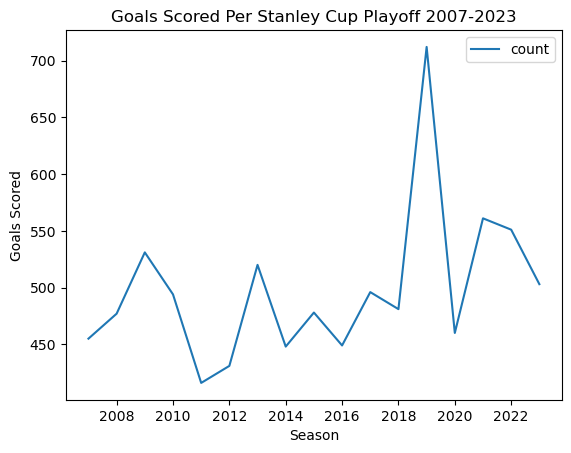

In [25]:
goals_per_po.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Goals Scored", fontsize=10)
plt.title("Goals Scored Per Stanley Cup Playoff 2007-2023")
#plt.savefig('Goals Scored Per SCP.png', bbox_inches='tight')
plt.show();

In [26]:
most_po_goals = po_goals.loc[po_goals['season'] == 2019]

In [27]:
most_po_goals.groupby(['teamCode'])['event'].value_counts().reset_index()

,teamCode,event,count
0,ARI,GOAL,22
1,BOS,GOAL,29
2,CAR,GOAL,22
3,CBJ,GOAL,24
4,CGY,GOAL,33
5,CHI,GOAL,27
6,COL,GOAL,60
7,DAL,GOAL,78
8,EDM,GOAL,15
9,FLA,GOAL,7


In [28]:
po_goal_inv = most_po_goals[['homeTeamCode', 'awayTeamCode', 'teamCode', 'event', 'isPlayoffGame']]

In [29]:
po_goal_inv.loc[po_goal_inv['teamCode'] == 'ARI']

,homeTeamCode,awayTeamCode,teamCode,event,isPlayoffGame
37987,NSH,ARI,ARI,GOAL,1
37988,NSH,ARI,ARI,GOAL,1
37989,NSH,ARI,ARI,GOAL,1
37991,NSH,ARI,ARI,GOAL,1
38055,NSH,ARI,ARI,GOAL,1
38056,NSH,ARI,ARI,GOAL,1
38085,ARI,NSH,ARI,GOAL,1
38087,ARI,NSH,ARI,GOAL,1
38088,ARI,NSH,ARI,GOAL,1
38089,ARI,NSH,ARI,GOAL,1


How many goals (per season) has each team scored?

In [31]:
reg_szn_goals_by_team = reg_szn_goals.groupby(['teamCode'])['event'].value_counts().reset_index()

In [32]:
reg_szn_goals_order = reg_szn_goals_by_team.sort_values(by = 'count', ascending = False).reset_index(drop = True)

In [33]:
reg_szn_goals_order

,teamCode,event,count
0,PIT,GOAL,4118
1,TBL,GOAL,4078
2,WSH,GOAL,4054
3,TOR,GOAL,4001
4,BOS,GOAL,3951
5,COL,GOAL,3846
6,NYR,GOAL,3804
7,CHI,GOAL,3800
8,CGY,GOAL,3795
9,STL,GOAL,3793


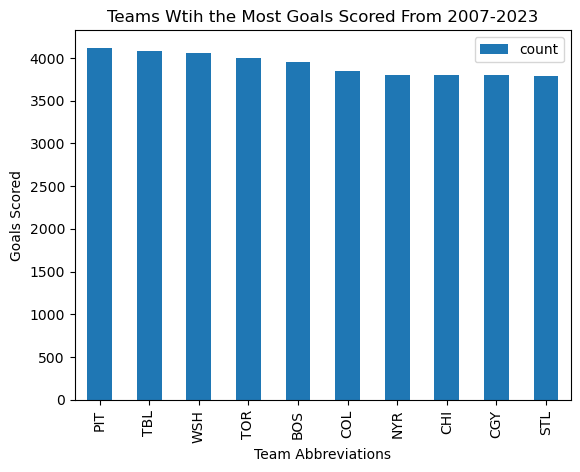

In [34]:
reg_szn_goals_order.head(10).plot(x = 'teamCode', y = 'count', kind = 'bar')
plt.xlabel("Team Abbreviations", fontsize=10)
plt.ylabel("Goals Scored", fontsize=10)
plt.title("Teams Wtih the Most Goals Scored From 2007-2023")
#plt.savefig('Teams With Most Goals.png', bbox_inches='tight')
plt.show();

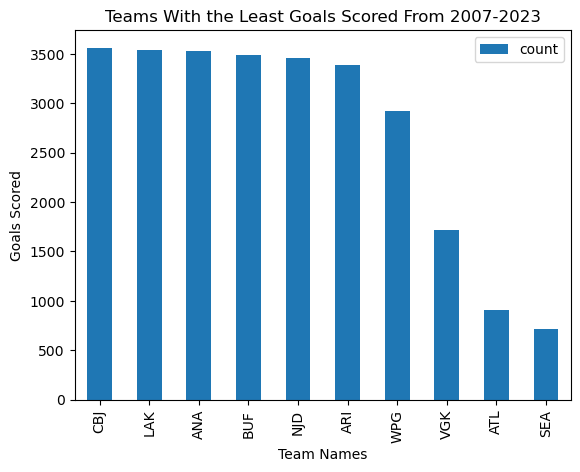

In [35]:
reg_szn_goals_order.tail(10).plot(x = 'teamCode', y = 'count', kind = 'bar')
plt.xlabel("Team Names", fontsize=10)
plt.ylabel("Goals Scored", fontsize=10)
plt.title("Teams With the Least Goals Scored From 2007-2023")
#plt.savefig('Teams With Least Goals.png', bbox_inches='tight')
plt.show;

What is the overall scoring percentage across the whole dataset? How does it look like broken down by year? Playoffs?

In [37]:
shot_num = just_shots.shape[0]
print(shot_num)

1202250


In [38]:
goals_num = goals.shape[0]
print(goals_num)

123164


In [39]:
(goals_num/shot_num) *100

10.244458307340404

In [40]:
po_just_shots = just_shots.loc[just_shots["isPlayoffGame"] == 1]

In [41]:
po_js_num = po_just_shots.shape[0]

In [42]:
print(po_js_num)

86346


In [43]:
po_just_goals = goals.loc[goals["isPlayoffGame"] == 1]

In [44]:
po_jg_num = po_just_goals.shape[0]

In [45]:
print(po_jg_num)

8463


In [46]:
(po_jg_num/po_js_num) *100

9.801264679313459

In [47]:
player_goals_rs = reg_szn_goals.groupby(['shooterName'])['event'].value_counts().reset_index()

In [48]:
player_goals_rs

,shooterName,event,count
0,A.J. Greer,GOAL,13
1,Aaron Downey,GOAL,1
2,Aaron Ekblad,GOAL,116
3,Aaron Gagnon,GOAL,3
4,Aaron Johnson,GOAL,10
...,...,...,...
2393,Zack Stortini,GOAL,13
2394,Zbynek Michalek,GOAL,28
2395,Zdeno Chara,GOAL,141
2396,Zemgus Girgensons,GOAL,89


In [49]:
player_goals_rs = player_goals_rs.sort_values(by = 'count', ascending = False).reset_index(drop=True)

In [50]:
player_goals_rs.head(5)

,shooterName,event,count
0,Alex Ovechkin,GOAL,752
1,Steven Stamkos,GOAL,552
2,Sidney Crosby,GOAL,517
3,Patrick Kane,GOAL,471
4,Evgeni Malkin,GOAL,464


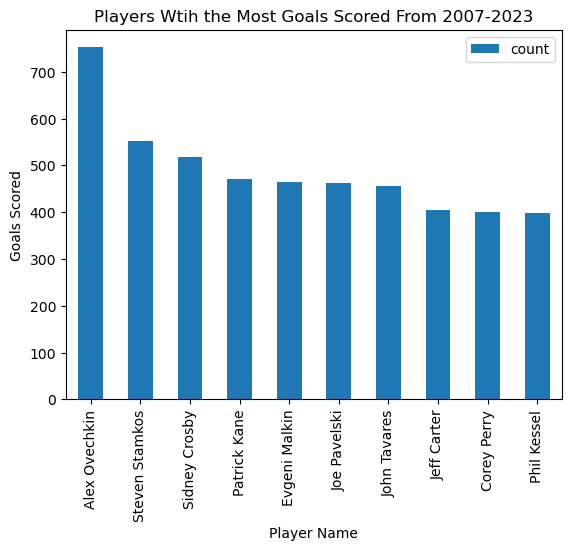

In [51]:
player_goals_rs.head(10).plot(x = 'shooterName', y = 'count', kind = 'bar')
plt.xlabel("Player Name", fontsize=10)
plt.ylabel("Goals Scored", fontsize=10)
plt.title("Players Wtih the Most Goals Scored From 2007-2023")
#plt.savefig('Active Players With Most Goals.png', bbox_inches='tight')
plt.show;

In [52]:
po_goals_player = po_goals.groupby(['shooterName'])['event'].value_counts().reset_index()

In [53]:
player_goals_po = po_goals_player.sort_values(by = 'count', ascending = False).reset_index(drop=True)

In [54]:
player_goals_po.head(5)

,shooterName,event,count
0,Joe Pavelski,GOAL,73
1,Alex Ovechkin,GOAL,72
2,Sidney Crosby,GOAL,68
3,Evgeni Malkin,GOAL,67
4,Nikita Kucherov,GOAL,54


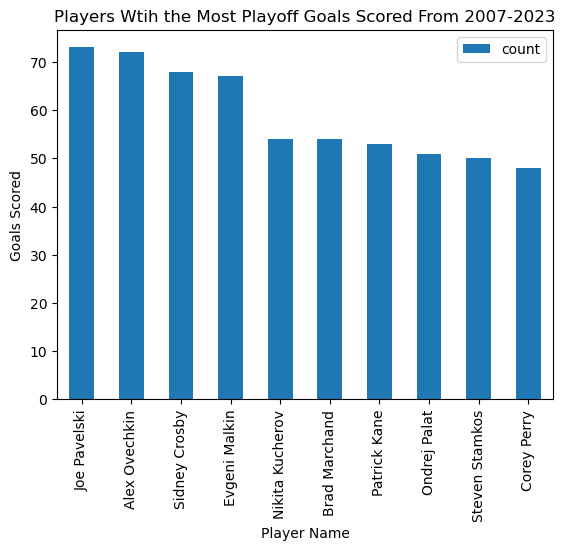

In [55]:
player_goals_po.head(10).plot(x = 'shooterName', y = 'count', kind = 'bar')
plt.xlabel("Player Name", fontsize=10)
plt.ylabel("Goals Scored", fontsize=10)
plt.title("Players Wtih the Most Playoff Goals Scored From 2007-2023")
#plt.savefig('Active Players With Most Playoff Goals.png', bbox_inches='tight')
plt.show;

Trendline: 

z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), color='red', label='Trendline')


In [57]:
Ovi = reg_szn_goals.loc[reg_szn_goals['shooterName'] == 'Alex Ovechkin']

In [58]:
Ovi.head(3)

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
507,7231,WSH,TOR,2023,0,20083,0,176,2389,0.0,...,0.107177,0.091440,0.486802,0.200011,0.024217,0.797266,1.0,1.0,WSH,85.0
614,8583,NJD,WSH,2023,0,20099,0,274,3505,0.0,...,0.012575,0.008827,0.068725,0.084854,0.009126,0.754611,0.0,1.0,WSH,40.0
1340,18905,NYI,WSH,2023,0,20216,0,44,558,0.0,...,0.366520,0.034049,0.316077,0.216967,0.027894,0.778391,0.0,1.0,WSH,55.0


In [59]:
Ovi.event.value_counts()

event
GOAL    752
Name: count, dtype: int64

In [60]:
Ovi_goals_szn = Ovi.groupby(['season'])['event'].value_counts().reset_index()

In [61]:
Ovi_goals_szn

,season,event,count
0,2007,GOAL,65
1,2008,GOAL,56
2,2009,GOAL,49
3,2010,GOAL,31
4,2011,GOAL,38
5,2012,GOAL,32
6,2013,GOAL,51
7,2014,GOAL,53
8,2015,GOAL,50
9,2016,GOAL,33


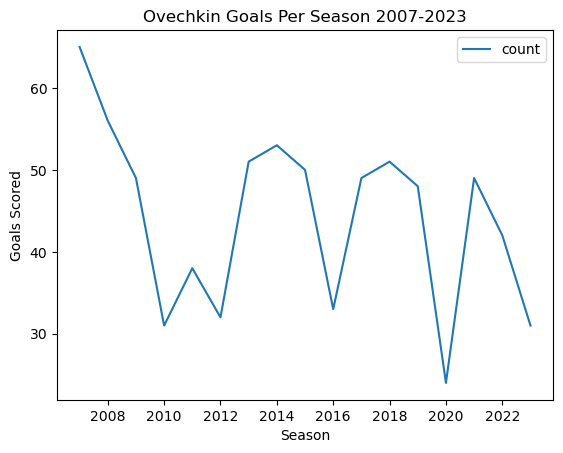

In [62]:
Ovi_goals_szn.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Goals Scored", fontsize=10)
plt.title("Ovechkin Goals Per Season 2007-2023")
#plt.savefig('Ovi Goals.png', bbox_inches='tight')
plt.show();

In [63]:
Ovi_po = po_goals.loc[po_goals['shooterName'] == 'Alex Ovechkin']

In [64]:
Ovi_po.head(3)

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
25618,359660,WSH,FLA,2021,1,30113,1,319,3025,0.0,...,0.149587,0.048891,0.449275,0.255587,0.022286,0.674149,1.0,1.0,WSH,54.0
31128,438202,BOS,WSH,2020,1,30123,1,167,1701,0.0,...,0.065116,0.021049,0.158981,0.084798,0.013488,0.866006,0.0,1.0,WSH,69.0
31183,438937,BOS,WSH,2020,1,30124,1,258,2694,0.0,...,0.106921,0.030295,0.259698,0.123381,0.018657,0.780112,0.0,1.0,WSH,48.0


In [65]:
Ovi_po_goals = Ovi_po.groupby(['season'])['event'].value_counts().reset_index()

In [66]:
Ovi_po_goals

,season,event,count
0,2007,GOAL,4
1,2008,GOAL,11
2,2009,GOAL,5
3,2010,GOAL,5
4,2011,GOAL,5
5,2012,GOAL,1
6,2014,GOAL,5
7,2015,GOAL,5
8,2016,GOAL,5
9,2017,GOAL,15


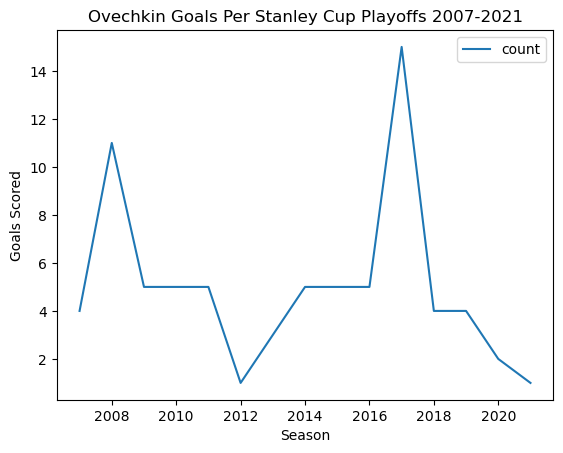

In [67]:
Ovi_po_goals.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Goals Scored", fontsize=10)
plt.title("Ovechkin Goals Per Stanley Cup Playoffs 2007-2021")
#plt.savefig('Ovi Playoff Goals.png', bbox_inches='tight')
plt.show();

In [68]:
reg = reg_szn_goals[['season', 'teamCode', 'event']]
reg.head()

,season,teamCode,event
0,2023,TBL,GOAL
1,2023,NSH,GOAL
2,2023,NSH,GOAL
3,2023,TBL,GOAL
4,2023,NSH,GOAL


In [69]:
t_s_g = reg.groupby(['season'])['teamCode'].value_counts().reset_index()

In [70]:
avg_g_year = t_s_g.groupby(['teamCode'])['count'].mean().reset_index()

In [71]:
mean_team_season = t_s_g.groupby(['season', 'teamCode'])['count'].mean().reset_index()

In [72]:
mean_team_season.head()

,season,teamCode,count
0,2007,ANA,203.0
1,2007,ARI,210.0
2,2007,ATL,204.0
3,2007,BOS,203.0
4,2007,BUF,250.0


In [73]:
mean_team_season

,season,teamCode,count
0,2007,ANA,203.0
1,2007,ARI,210.0
2,2007,ATL,204.0
3,2007,BOS,203.0
4,2007,BUF,250.0
...,...,...,...
515,2023,TOR,298.0
516,2023,VAN,279.0
517,2023,VGK,263.0
518,2023,WPG,258.0


In [74]:
mts = mean_team_season.sort_values(by = 'count', ascending = False)

In [75]:
mts.head(5)

,season,teamCode,count
436,2021,FLA,337.0
467,2022,EDM,323.0
356,2018,TBL,317.0
89,2009,WSH,312.0
451,2021,TOR,312.0


In [76]:
avg_g_year.sort_values(by = 'count', ascending = False)

,teamCode,count
30,VGK,245.000000
23,PIT,242.235294
27,TBL,239.882353
24,SEA,238.666667
32,WSH,238.470588
28,TOR,235.352941
3,BOS,232.411765
2,ATL,226.500000
9,COL,226.235294
31,WPG,224.846154


In [77]:
reg_szn_goals.groupby(['teamCode'])['event'].value_counts().reset_index()

,teamCode,event,count
0,ANA,GOAL,3528
1,ARI,GOAL,3386
2,ATL,GOAL,906
3,BOS,GOAL,3951
4,BUF,GOAL,3493
5,CAR,GOAL,3743
6,CBJ,GOAL,3562
7,CGY,GOAL,3795
8,CHI,GOAL,3800
9,COL,GOAL,3846


In [78]:
st_count = reg_szn_goals.groupby(['season'])['shotType'].value_counts().reset_index()

In [79]:
st_count.head()

,season,shotType,count
0,2007,WRIST,2927
1,2007,SLAP,1103
2,2007,SNAP,1086
3,2007,TIP,790
4,2007,BACK,615


In [80]:
esst = reg_szn_goals[['event', 'season', 'shotType']]

In [81]:
type_cps = esst.groupby(['season'])['shotType'].value_counts().reset_index()

In [82]:
type_cps.tail(14)

,season,shotType,count
105,2022,WRIST,4027
106,2022,SNAP,1555
107,2022,TIP,849
108,2022,SLAP,713
109,2022,BACK,677
110,2022,DEFL,222
111,2022,WRAP,58
112,2023,WRIST,3989
113,2023,SNAP,1498
114,2023,TIP,845


In [83]:
most_per_year = type_cps.groupby(['season'])['count'].max().reset_index()

In [84]:
most_per_year

,season,count
0,2007,2927
1,2008,3169
2,2009,3158
3,2010,3329
4,2011,3113
5,2012,1885
6,2013,3227
7,2014,3173
8,2015,3255
9,2016,3337


In [85]:
count_type = pd.merge(most_per_year, type_cps, 
                               left_on = 'count', right_on = 'count', 
                               how = 'left')
count_type.head(19)

,season_x,count,season_y,shotType
0,2007,2927,2007,WRIST
1,2008,3169,2008,WRIST
2,2009,3158,2009,WRIST
3,2010,3329,2010,WRIST
4,2011,3113,2011,WRIST
5,2012,1885,2012,WRIST
6,2013,3227,2013,WRIST
7,2014,3173,2014,WRIST
8,2015,3255,2015,WRIST
9,2016,3337,2016,WRIST


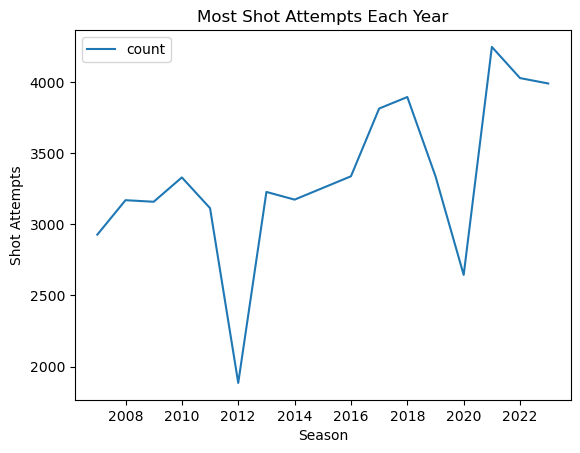

In [86]:
count_type.plot(x = 'season_x', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Shot Attempts", fontsize=10)
plt.title("Most Shot Attempts Each Year")
#plt.savefig('Most Shot Attempts.png', bbox_inches='tight')
plt.show();

In [87]:
WRIST = st_count.loc[st_count['shotType'] == 'WRIST']

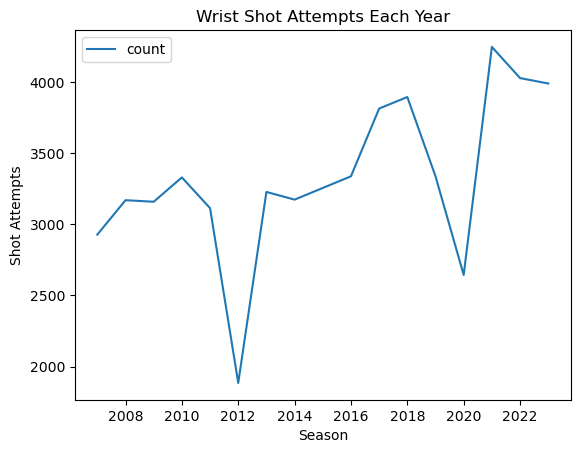

In [88]:
WRIST.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Shot Attempts", fontsize=10)
plt.title("Wrist Shot Attempts Each Year")
#plt.savefig('Wrist Shot Attempts.png', bbox_inches='tight')
plt.show();

In [89]:
SLAP = st_count.loc[st_count['shotType'] == 'SLAP']

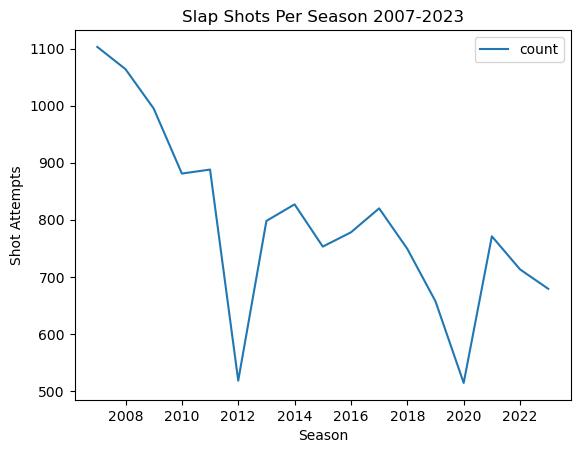

In [90]:
SLAP.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Shot Attempts", fontsize=10)
plt.title("Slap Shots Per Season 2007-2023")
#plt.savefig('Slap Shots Per Year.png', bbox_inches='tight')
plt.show();

In [91]:
WRAP = st_count.loc[st_count['shotType'] == 'WRAP']

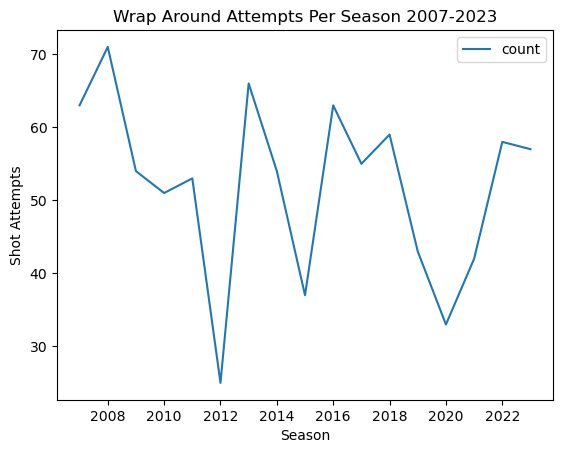

In [92]:
WRAP.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Shot Attempts", fontsize=10)
plt.title("Wrap Around Attempts Per Season 2007-2023")
#plt.savefig('Wrap Around Attempts.png', bbox_inches='tight')
plt.show();

In [93]:
SNAP = st_count.loc[st_count['shotType'] == 'SNAP']

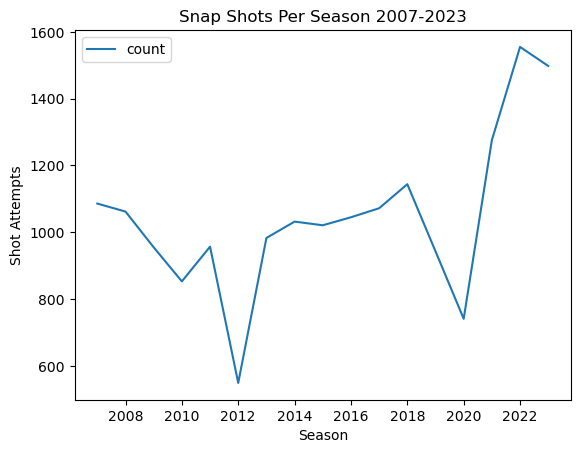

In [94]:
SNAP.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Shot Attempts", fontsize=10)
plt.title("Snap Shots Per Season 2007-2023")
#plt.savefig('Snpa Shots Attempts.png', bbox_inches='tight')
plt.show();

In [95]:
DEFL = st_count.loc[st_count['shotType'] == 'DEFL']

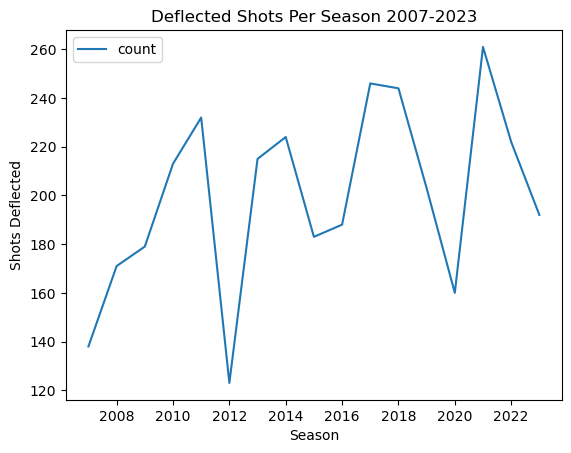

In [96]:
DEFL.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Shots Deflected", fontsize=10)
plt.title("Deflected Shots Per Season 2007-2023")
#plt.savefig('Deflected Shots.png', bbox_inches='tight')
plt.show();

In [97]:
TIP = st_count.loc[st_count['shotType'] == 'TIP']

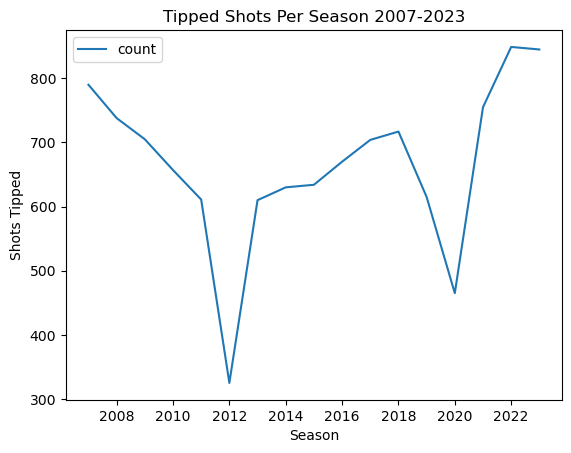

In [98]:
TIP.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Shots Tipped", fontsize=10)
plt.title("Tipped Shots Per Season 2007-2023")
#plt.savefig('Tip Time.png', bbox_inches='tight')
plt.show();

In [99]:
BACK = st_count.loc[st_count['shotType'] == 'BACK']

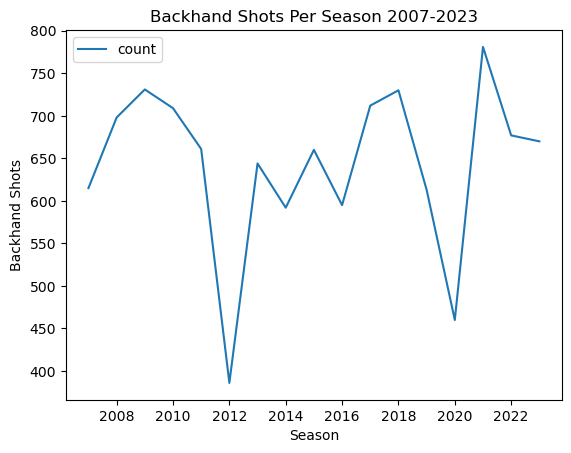

In [100]:
BACK.plot(x = 'season', y = 'count', kind = 'line')
plt.xlabel("Season", fontsize=10)
plt.ylabel("Backhand Shots", fontsize=10)
plt.title("Backhand Shots Per Season 2007-2023")
#plt.savefig('Backhand.png', bbox_inches='tight')
plt.show();